In [1]:
import pandas as pd,seaborn as sns,numpy as np

In [2]:
data = pd.read_csv('obesity.csv')

In [3]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
data.drop('ID',inplace=True,axis=1)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,108.0,46.555556,24.720620,11.0,27.0,42.5,59.25,112.0
Height,108.0,166.574074,27.873615,120.0,140.0,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.0,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.7,21.2,26.10,37.2


In [8]:
data.dtypes

Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

## Converting some features to int

In [64]:
df=data.copy()

In [65]:
df["is_female"] = df.Gender.apply(lambda x: 0 if x=="Male" else 1)

In [66]:
df.drop('Gender',axis=1,inplace=True)

In [67]:
df.head()

,Age,Height,Weight,BMI,Label,is_female
0,25,175,80,25.3,Normal Weight,0
1,30,160,60,22.5,Normal Weight,1
2,35,180,90,27.3,Overweight,0
3,40,150,50,20.0,Underweight,1
4,45,190,100,31.2,Obese,0


In [68]:
df.Label.unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

In [69]:
df.Label =  (df.Label.replace(to_replace="Underweight",value=1)
                    .replace(to_replace="Normal Weight",value=2)
                    .replace(to_replace="Overweight",value=3)
                    .replace(to_replace="Obese",value=4))

## Visual

In [70]:
df.corr()

,Age,Height,Weight,BMI,Label,is_female
Age,1.000000,-0.076896,0.465106,0.474185,0.451868,0.091964
Height,-0.076896,1.000000,0.428890,0.354340,0.428596,-0.876225
Weight,0.465106,0.428890,1.000000,0.972829,0.935518,-0.418415
BMI,0.474185,0.354340,0.972829,1.000000,0.871449,-0.342342
Label,0.451868,0.428596,0.935518,0.871449,1.000000,-0.405208
is_female,0.091964,-0.876225,-0.418415,-0.342342,-0.405208,1.000000


<b> Almost every feature has colleration with Label

<AxesSubplot: >

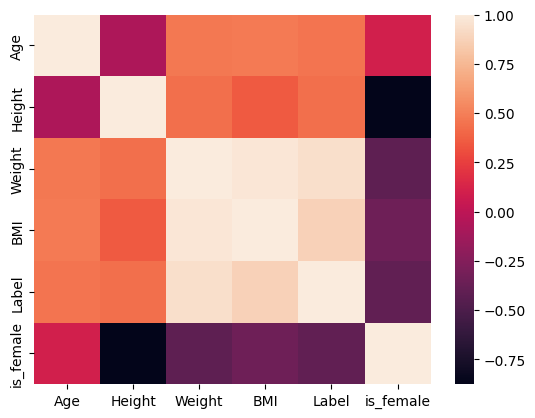

In [71]:
sns.heatmap(df.corr())

<b>BMI and Weight has almost 0.95 colleration and they already meaning almost the same think.so removing one

In [72]:
df.drop('Weight',axis=1,inplace=True)

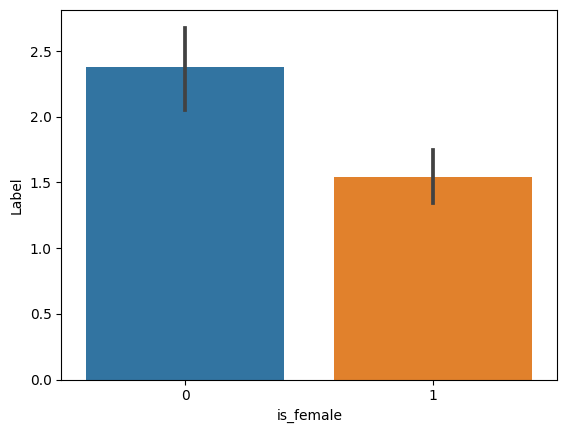

In [73]:
#let see the sex affects for label

sns.barplot(data=df,x="is_female",y = "Label");

<b>So the ratio of obesity is more in male.

## Variables

In [77]:
X = df.drop("Label",axis=1)  
y = df.Label

In [79]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

In [80]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

## model creation

In [82]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [83]:
models = dict(
    lr_model = LogisticRegression(),
    cb_model = CatBoostClassifier(),
    lgmb_model = LGBMClassifier(),
    rf_model = RandomForestClassifier()
)

In [84]:
for model in models.values():
    model.fit(x_train,y_train)

Learning rate set to 0.06982
0:	learn: 1.2752435	total: 56.6ms	remaining: 56.5s
1:	learn: 1.2295354	total: 57.3ms	remaining: 28.6s
2:	learn: 1.1744627	total: 57.8ms	remaining: 19.2s
3:	learn: 1.1034883	total: 58.6ms	remaining: 14.6s
4:	learn: 1.0638798	total: 59.1ms	remaining: 11.8s
5:	learn: 1.0130266	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9805701	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9327353	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8908286	total: 61.5ms	remaining: 6.77s
9:	learn: 0.8448600	total: 62ms	remaining: 6.14s
10:	learn: 0.8087863	total: 62.4ms	remaining: 5.61s
11:	learn: 0.7672311	total: 63.1ms	remaining: 5.19s
12:	learn: 0.7364112	total: 63.6ms	remaining: 4.83s
13:	learn: 0.7142703	total: 64.2ms	remaining: 4.52s
14:	learn: 0.6867992	total: 64.6ms	remaining: 4.25s
15:	learn: 0.6608245	total: 65.1ms	remaining: 4s
16:	learn: 0.6444367	total: 65.5ms	remaining: 3.79s
17:	learn: 0.6174412	total: 65.9ms	remaining: 3.6s
18:	learn: 0.6005506	total: 66.4ms	remaining: 3.43s

262:	learn: 0.0220791	total: 175ms	remaining: 491ms
263:	learn: 0.0219860	total: 176ms	remaining: 491ms
264:	learn: 0.0218575	total: 177ms	remaining: 490ms
265:	learn: 0.0217663	total: 177ms	remaining: 489ms
266:	learn: 0.0216645	total: 178ms	remaining: 488ms
267:	learn: 0.0215745	total: 178ms	remaining: 487ms
268:	learn: 0.0214801	total: 179ms	remaining: 485ms
269:	learn: 0.0213669	total: 179ms	remaining: 484ms
270:	learn: 0.0212283	total: 180ms	remaining: 484ms
271:	learn: 0.0211367	total: 180ms	remaining: 482ms
272:	learn: 0.0210399	total: 181ms	remaining: 482ms
273:	learn: 0.0209255	total: 181ms	remaining: 480ms
274:	learn: 0.0208620	total: 182ms	remaining: 479ms
275:	learn: 0.0207511	total: 182ms	remaining: 479ms
276:	learn: 0.0206126	total: 183ms	remaining: 477ms
277:	learn: 0.0204958	total: 183ms	remaining: 476ms
278:	learn: 0.0203937	total: 184ms	remaining: 476ms
279:	learn: 0.0203016	total: 185ms	remaining: 474ms
280:	learn: 0.0201422	total: 185ms	remaining: 473ms
281:	learn: 

615:	learn: 0.0073962	total: 350ms	remaining: 218ms
616:	learn: 0.0073800	total: 351ms	remaining: 218ms
617:	learn: 0.0073691	total: 351ms	remaining: 217ms
618:	learn: 0.0073572	total: 352ms	remaining: 216ms
619:	learn: 0.0073410	total: 352ms	remaining: 216ms
620:	learn: 0.0073312	total: 353ms	remaining: 215ms
621:	learn: 0.0073167	total: 353ms	remaining: 215ms
622:	learn: 0.0072995	total: 354ms	remaining: 214ms
623:	learn: 0.0072846	total: 354ms	remaining: 214ms
624:	learn: 0.0072729	total: 355ms	remaining: 213ms
625:	learn: 0.0072618	total: 356ms	remaining: 212ms
626:	learn: 0.0072473	total: 356ms	remaining: 212ms
627:	learn: 0.0072305	total: 357ms	remaining: 211ms
628:	learn: 0.0072148	total: 357ms	remaining: 211ms
629:	learn: 0.0072033	total: 357ms	remaining: 210ms
630:	learn: 0.0071950	total: 358ms	remaining: 209ms
631:	learn: 0.0071864	total: 359ms	remaining: 209ms
632:	learn: 0.0071724	total: 359ms	remaining: 208ms
633:	learn: 0.0071565	total: 360ms	remaining: 208ms
634:	learn: 

986:	learn: 0.0043547	total: 525ms	remaining: 6.91ms
987:	learn: 0.0043516	total: 526ms	remaining: 6.38ms
988:	learn: 0.0043457	total: 526ms	remaining: 5.85ms
989:	learn: 0.0043415	total: 527ms	remaining: 5.32ms
990:	learn: 0.0043386	total: 527ms	remaining: 4.79ms
991:	learn: 0.0043327	total: 528ms	remaining: 4.26ms
992:	learn: 0.0043268	total: 528ms	remaining: 3.72ms
993:	learn: 0.0043234	total: 529ms	remaining: 3.19ms
994:	learn: 0.0043175	total: 529ms	remaining: 2.66ms
995:	learn: 0.0043135	total: 530ms	remaining: 2.13ms
996:	learn: 0.0043100	total: 530ms	remaining: 1.59ms
997:	learn: 0.0043059	total: 531ms	remaining: 1.06ms
998:	learn: 0.0043001	total: 531ms	remaining: 531us
999:	learn: 0.0042955	total: 532ms	remaining: 0us


In [85]:
for k,v in models.items():
    print("{} has score => {}".format(k,v.score(x_test,y_test)))

lr_model has score => 0.5909090909090909
cb_model has score => 1.0
lgmb_model has score => 0.9545454545454546
rf_model has score => 0.9545454545454546


In [86]:
from sklearn.metrics import accuracy_score
for k,v in models.items():
    print("{} has accuracy => {}".format(k,accuracy_score(v.predict(x_test),y_test)))

lr_model has accuracy => 0.5909090909090909
cb_model has accuracy => 1.0
lgmb_model has accuracy => 0.9545454545454546
rf_model has accuracy => 0.9545454545454546


## Result

with <b>catboost</b> model we got <b>%100</b> accuracy and scored